**Created by Berkay Alan**

**Classification | Decision Tree**

**17 January 2022**

**For more Tutorial:** https://github.com/berkayalan

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**Logistic Regression by Statquest**](https://www.youtube.com/watch?v=yIYKR4sgzI8&ab_channel=StatQuestwithJoshStarmer)

- [**The Ultimate Guide to Regression & Classification**](https://www.superdatascience.com/blogs/the-ultimate-guide-to-regression-classification)

- [**Logistic Regression for Machine Learning**](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)

- [**Logistic Regression by Stanford University**](https://web.stanford.edu/class/stats202/notes/Classification/Logistic-regression.html)

- [**What is a Confusion Matrix in Machine Learning?**](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

- [**Support Vector Machines for Machine Learning**](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)

- [**Support Vector Machines with Scikit-learn**](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

- [**Support Vector Machines by Statquest**](https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer)

- [**Support Vector Machines with Scikit-learn**](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

- [**SVM by Sklearn**](https://scikit-learn.org/stable/modules/svm.html)

- [**Kernel Functions-Introduction to SVM Kernel & Examples**](https://data-flair.training/blogs/svm-kernel-functions/)

- [**Naive Bayes for Machine Learning**](https://machinelearningmastery.com/naive-bayes-for-machine-learning/)

- [**Gaussian Naive Bayes by Statquest**](https://www.youtube.com/watch?v=H3EjCKtlVog&ab_channel=StatQuestwithJoshStarmer)

- [**Introduction To Naive Bayes Algorithm**](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-naive-bayes-algorithm/)

- [**Naive Bayes Classifier**](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c)

- [**Classification: Precision and Recall**](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

- [**Classification: ROC Curve and AUC**](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

- [**AUC-ROC Curve in Machine Learning Clearly Explained**](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

## Importing Libraries

In [104]:
from warnings import filterwarnings
filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
import time
from skompiler import skompile
from joblib import dump, load

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [106]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Classification and Evaluation Metrics

### Classification

Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data. 
The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The classification process deal with the problems where the data can be divided into binary or multiple discrete labels. 

Some use-cases:

- Mail classification (spam or not)

- Diagnosis of the sicknesses

- Customer buying prediction (if customer will buy or not)

### Evaluation Metrics

#### Confusion Matrix

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate our model.  Confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- **true positive**: These are cases in which we predicted positive, and they are actually positive.
- **false positive (Type 1 Error)**: We predicted postive, but they are actually negative. (Also known as a "Type 1 error.")
- **true negative**: We predicted negative, and they are actually negative.
- **false negative (Type 2 Error)**: We predicted negative, but they are actually postive. (Also known as a "Type 2 error.")

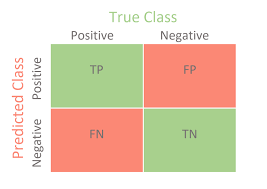

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw29atdmY9s4wmI-rc0qQZZb&ust=1628435461495000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKj1g_2Yn_ICFQAAAAAdAAAAABAD).

**Notation**: TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

#### Accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is **the fraction of predictions our model got right**.

Formally, accuracy has the following definition: All correct predictions / all predictions

For binary classification, accuracy can also be calculated in terms of positives and negatives as follow: (TP+TN) / (TP+FP+FN+TN)

#### Recall

Recall gives us the answer of this question :

**What proportion of actual positives was identified correctly?**

It is defined as follows: TP / (TP+FN)

#### Precision

Precision gives us the answer of this question : 

**What proportion of positive identifications was actually correct?**

It is defined as follows: TP / (TP+FP)

#### F1 - Score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

The formula for the F1 score is: 2 * (precision * recall) / (precision + recall)

#### ROC Curve (Receiver Operating Characteristic Curve)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

An ROC curve plots TP rates vs. FP rares at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

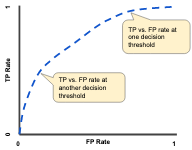

To compute the points in an ROC curve, we could evaluate a classification model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC (Area under Curve)

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

This is an example of AUC:

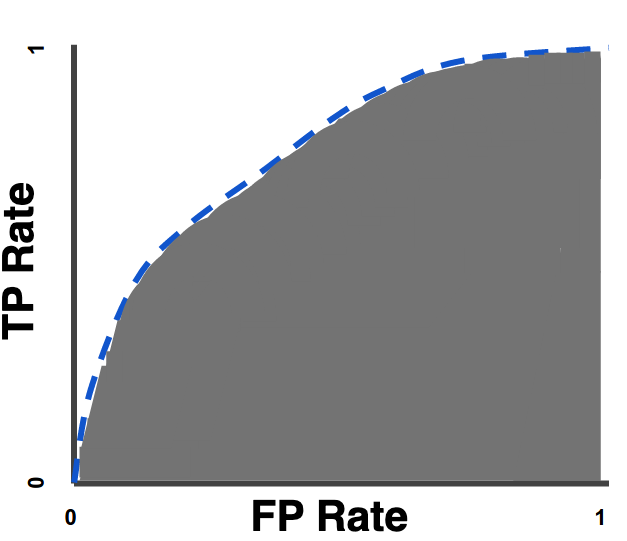

## Decision Tree Classification

### Theory

Decision Trees are an important type of algorithm for predictive modeling machine learning.

The representation for the CART model is a binary tree. Each root node represents a single input variable (x) and a split point on that variable (assuming the variable is numeric).

The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.

**Lockdown Example**

For example, I tried to generate a guide for citizens in the big cities about
going-out permissions during Covid-19 Pandemic. For the sake of simplicity, the users are adult
citizens who are older than 20 years.

The guide first checks the age of the citizen. If the citizen is 65+, then it checks if it is an Out-Day-
For65+. A 65+ user is allowed to go out only if it is an Out-Day-For-65+, otherwise he/she is
not allowed to go out.

If the age of the citizen is not 65+, then the guide checks if that day is a Lockdown-Day. If it is not a
lockdown day, this younger citizen is allowed to go out. However, if it is a lockdown day, the
younger citizens can go out only if he/she accompanies a 65+ person. Otherwise he is not allowed to go out.

In this example, *Age of Citizen* is **root node** at the beginning of a tree. It represents entire population being analyzed. From the root node, the population is divided according to age.

*Allowed to go out* and *Not allowed to go out* is **Leaf(Terminal) Node** that does not split anything.Splitting is a process of dividing a node into two or more sub-nodes.

**Parent and Child Node** is a node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

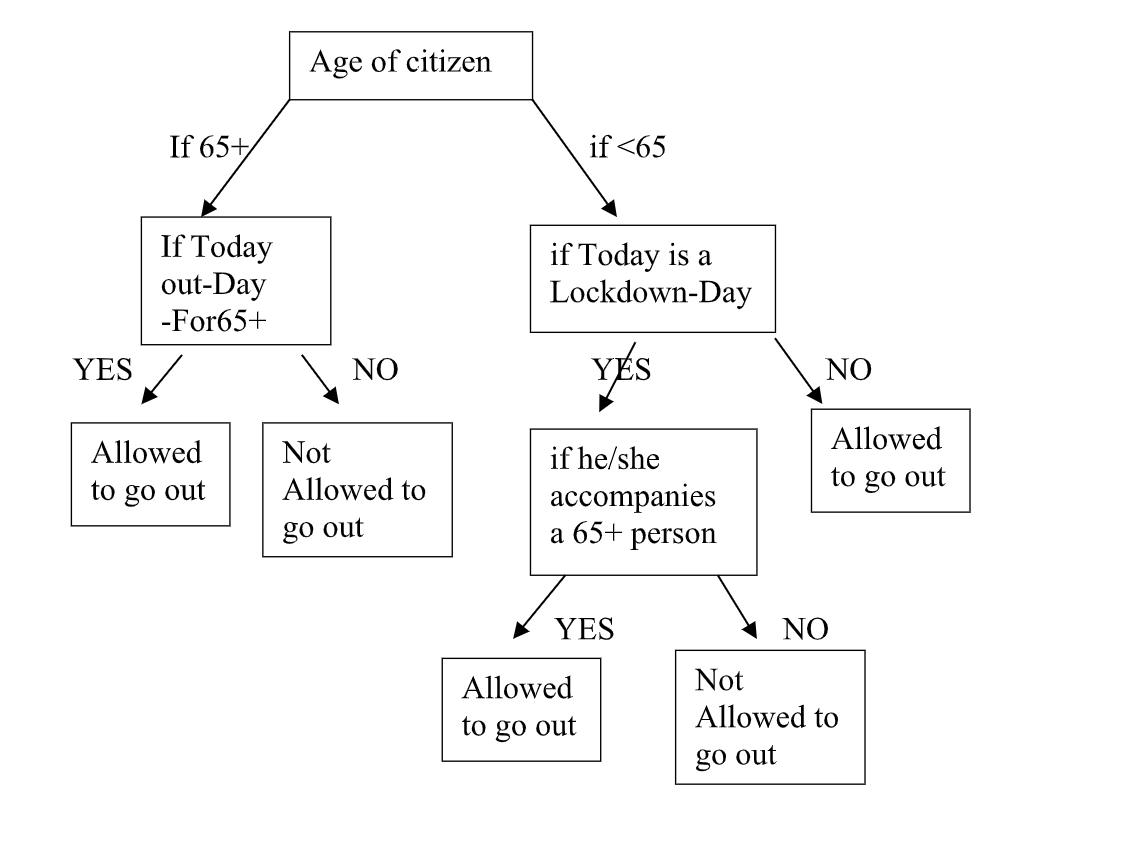

The Classification Tree (CART) algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [400]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [401]:
df.shape

(768, 9)

In [402]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [403]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [404]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [405]:
decision_tree = DecisionTreeClassifier().fit(X_train,y_train)

In [406]:
decision_tree

DecisionTreeClassifier()

In [412]:
decision_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [411]:
decision_tree.get_n_leaves()

110

In [410]:
decision_tree.get_depth()

14

Let's see the structure of the tree. It can be seen huge because of feature number.

In [430]:
print(skompile(decision_tree.predict).to("python/code"))

(((((0 if x[6] <= 0.671999990940094 else 0 if x[0] <= 2.5 else 1) if x[5] <=
    30.899999618530273 else (1 if x[5] <= 31.100000381469727 else (((0 if x
    [3] <= 40.5 else 1) if x[4] <= 34.0 else 1) if x[1] <= 111.5 else 1 if 
    x[5] <= 34.64999961853027 else 0) if x[4] <= 36.5 else (0 if x[6] <= 
    0.5094999969005585 else 1 if x[6] <= 0.5149999856948853 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[6] <= 0.6895000040531158 else (
    1 if x[1] <= 109.5 else 1 if x[3] <= 8.0 else 0) if x[6] <= 
    0.9174999892711639 else 0) if x[5] <= 45.39999961853027 else 1) if x[7] <=
    28.5 else (0 if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else
    (((1 if x[7] <= 32.0 else 0) if x[6] <= 0.17750000208616257 else 0) if 
    x[0] <= 9.5 else 0 if x[3] <= 15.5 else 1 if x[4] <= 27.0 else 0) if x[
    6] <= 1.1225000023841858 else 1) if x[1] <= 99.5 else (((((((0 if x[0] <=
    3.5 else 1) if x[2] <= 63.0 else 0) if x[0] <= 6.5 else 1 if x[0] <= 
    8.5 else 0) if

We can also plot it with *plot_tree()* function of sklearn.

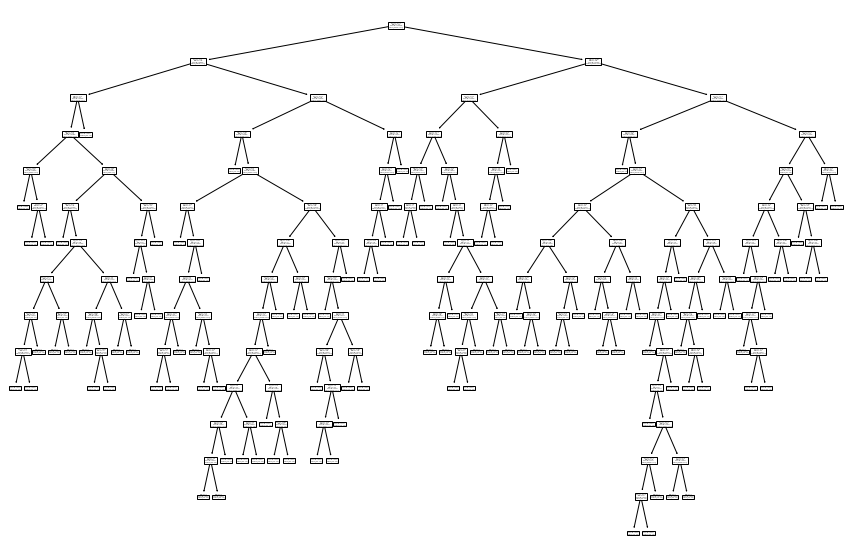

In [435]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree,proportion=True);

### Prediction

In [413]:
decision_tree

DecisionTreeClassifier()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [414]:
y_pred = decision_tree.predict(X_test)

In [415]:
cm = confusion_matrix(y_test,y_pred)

In [416]:
cm

array([[80, 28],
       [24, 36]])

In [417]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.6904761904761905


In [418]:
accuracy_score(y_test,y_pred)

0.6904761904761905

In [419]:
recall_score(y_test,y_pred)

0.6

In [420]:
precision_score(y_test,y_pred)

0.5625

In [421]:
f1_score(y_test,y_pred)

0.5806451612903225

In [422]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       108
           1       0.56      0.60      0.58        60

    accuracy                           0.69       168
   macro avg       0.67      0.67      0.67       168
weighted avg       0.70      0.69      0.69       168



### Model Tuning

In [423]:
decision_tree

DecisionTreeClassifier()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [424]:
accuracies= cross_val_score(estimator=decision_tree,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 67.83 %
Standart Deviation of Accuracies: 6.19 %


In [425]:
decision_tree.predict(X_test)[:10]

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

Now we will tune our model with GridSearch. We will tune *criterion*, *max_depth* and *min_samples_split* parameters.

In [437]:
decision_tree_params ={"criterion":["gini","entropy"],
                       "max_depth":[1,2,3,4,5,6,7,8,9,10],
                       "min_samples_split":list(range(1,10))}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [438]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_cv = GridSearchCV(decision_tree_classifier,decision_tree_params,cv=9,n_jobs=-1,verbose=2)

In [439]:
start_time = time.time()

decision_tree_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Decision Tree Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 180 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.9s


Elapsed time for Decision Tree Classifier cross validation: 6.978 seconds


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:    7.0s finished


In [440]:
#best score
decision_tree_cv.best_score_

0.7534046937032012

In [441]:
#best parameters
decision_tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [442]:
decision_tree_tuned = DecisionTreeClassifier(criterion="entropy",max_depth=2,min_samples_split=2).fit(X_train,y_train)

In [443]:
decision_tree_tuned

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [444]:
y_pred = decision_tree_tuned.predict(X_test)

In [445]:
cm = confusion_matrix(y_test,y_pred)

In [446]:
cm

array([[90, 18],
       [26, 34]])

In [447]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7380952380952381


In [448]:
accuracy_score(y_test,y_pred)

0.7380952380952381

In [449]:
recall_score(y_test,y_pred)

0.5666666666666667

In [450]:
precision_score(y_test,y_pred)

0.6538461538461539

In [451]:
f1_score(y_test,y_pred)

0.6071428571428571

In [452]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       108
           1       0.65      0.57      0.61        60

    accuracy                           0.74       168
   macro avg       0.71      0.70      0.71       168
weighted avg       0.73      0.74      0.73       168



If you want to see other algorithms such as:

- Logistic Regression (Theory - Model- Tuning)

- K - Nearest Neighbors(KNN) (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Linear Kernel (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Radial Basis Kernel (Theory - Model- Tuning)

- Ensemble Learning - Random Forests Classification (Theory - Model- Tuning)

- Naive Bayes Classification (Theory - Model)

- XGBoost(Extreme Gradient Boosting) Classification (Theory - Model- Tuning)

Please visit my [Classification tutorial](https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Classification/Classification.ipynb)